In [1]:
#downloading the data

In [2]:
import requests

In [3]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [4]:
response=requests.get(medical_charges_url)

In [5]:
with open('medical.csv','wb') as f:
  f.write(response.content)

In [6]:
##alternate way

In [7]:
from urllib.request import urlretrieve

In [8]:
urlretrieve(medical_charges_url,'medical1.csv')

('medical1.csv', <http.client.HTTPMessage at 0x7f2cdee00d60>)

In [9]:
! pip install pandas-profiling --quiet

In [10]:
import pandas as pd
df=pd.read_csv('medical.csv')

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data=df.copy()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
import plotly.express as px
import matplotlib

In [17]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'


In [18]:
fig=px.histogram(data,x='age',marginal='box',nbins=47,title='distribution of age')
fig.update_layout(bargap=0.1)
fig.show()

In [19]:
fig=px.histogram(data,x='bmi',marginal='box',nbins=47,title='distribution of bmi')
fig.update_layout(bargap=0.1)
fig.show()

In [20]:
fig=px.histogram(data,x='smoker',marginal='box',nbins=47,title='distribution of smoker',color_discrete_sequence=['green','red'])
fig.update_layout(bargap=0.1)
fig.show()

In [21]:
fig=px.histogram(data,x='charges',color='sex',marginal='box',nbins=47,title='distribution of smoker',color_discrete_sequence=['green','red'])
fig.update_layout(bargap=0.1)
fig.show()

In [22]:
data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [23]:
fig=px.histogram(data,x='smoker',color='sex',marginal='box',nbins=47,title='distribution of smoker',color_discrete_sequence=['green','red'])
fig.update_layout(bargap=0.1)
fig.show()

In [24]:
fig=px.scatter(data,x='age',y='charges',color='smoker',hover_data=['sex'],title='avg vs charges')

fig.update_traces(marker_size=5)

fig.show()

In [25]:
fig=px.scatter(data,x='bmi',y='charges',color='smoker',hover_data=['sex'],title='avg vs charges')

fig.update_traces(marker_size=5)

fig.show()

In [26]:
## not a linear relationship between bmi and charges 

In [27]:
px.violin(data,'children','charges')

<Axes: xlabel='children', ylabel='charges'>

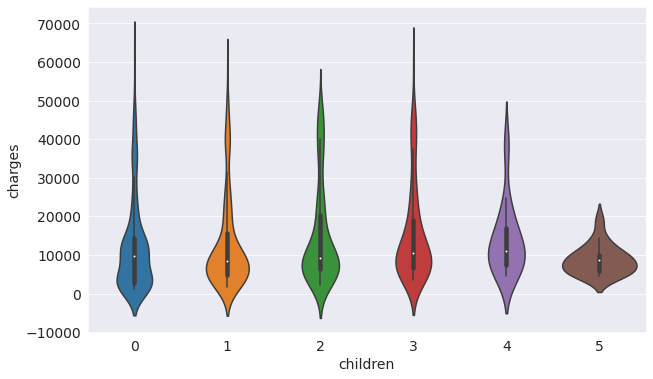

In [28]:
sns.violinplot(data=data,x='children',y='charges')

In [29]:
corr_series = data.corr()['charges']

In [30]:
corr_series


age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

In [31]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [32]:
from sklearn.preprocessing import LabelEncoder


In [33]:
l=LabelEncoder()

In [34]:
data['smoker']=l.fit_transform(data['smoker'])

In [35]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [36]:
data.corr()

,age,bmi,children,smoker,charges
age,1.000000,0.109272,0.042469,-0.025019,0.299008
bmi,0.109272,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.198341,0.067998,0.787251,1.000000


<Axes: >

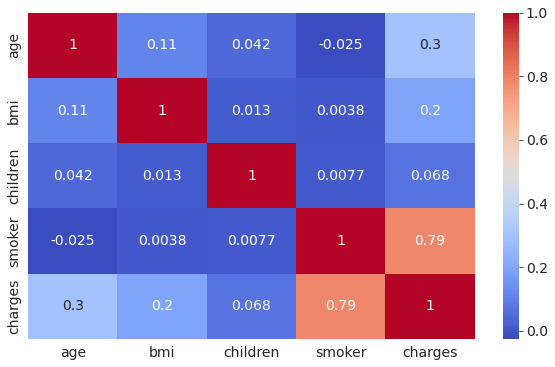

In [37]:
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

In [38]:

##linear regression using single feature

In [39]:
non_smoker_df = df[df['smoker']=='no']

<Axes: title={'center': 'age vs charges'}, xlabel='age', ylabel='charges'>

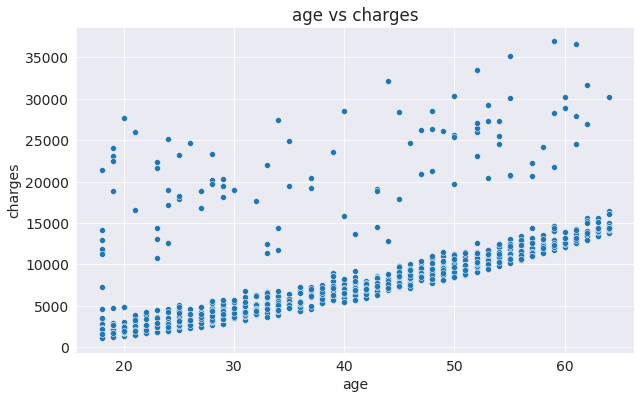

In [40]:
plt.title('age vs charges')
sns.scatterplot(data=non_smoker_df,x='age',y='charges')

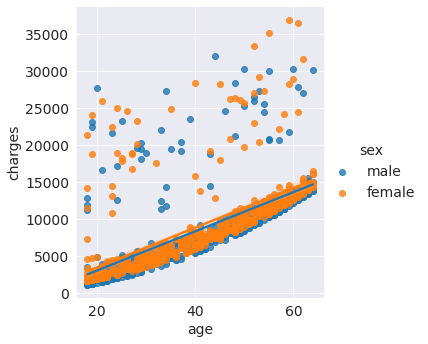

In [41]:
sns.lmplot(x='age',y='charges',data=non_smoker_df,hue='sex')

In [42]:
import numpy as np

In [44]:
def rmse(targets , predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))
  ### created a function of root mean squared error

In [45]:
## applying linear regression to our model

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr=LinearRegression()

In [49]:
b=LabelEncoder()

In [50]:
data['sex']=l.fit_transform(data['sex'])

In [51]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
data2=data.copy()

In [55]:
data2.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [69]:
ss=StandardScaler()

In [59]:
data2['charges']=ss.fit_transform(np.array(data2['charges']).reshape(-1,1))

In [79]:
data2.describe()

,age,sex,bmi,children,smoker,charges
count,1.338000e+03,1338.000000,1.338000e+03,1.338000e+03,1338.000000,1.338000e+03
mean,3.451814e-17,0.505232,-2.124194e-16,-5.576008e-17,0.204783,-8.098488e-17
std,1.000374e+00,0.500160,1.000374e+00,1.000374e+00,0.403694,1.000374e+00
min,-1.509965e+00,0.000000,-2.412011e+00,-9.086137e-01,0.000000,-1.003557e+00
25%,-8.691547e-01,0.000000,-7.164063e-01,-9.086137e-01,0.000000,-7.046504e-01
50%,-1.474046e-02,1.000000,-4.320880e-02,-7.876719e-02,0.000000,-3.212089e-01
75%,8.396738e-01,1.000000,6.611572e-01,7.510793e-01,0.000000,2.783441e-01
max,1.765289e+00,1.000000,3.685522e+00,3.240619e+00,1.000000,4.171663e+00


In [60]:
data2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,0.298584
1,18,1,33.770,1,0,southeast,-0.953689
2,28,1,33.000,3,0,southeast,-0.728675
3,33,1,22.705,0,0,northwest,0.719843
4,32,1,28.880,0,0,northwest,-0.776802


In [67]:
x=data2.iloc[:,0:-1]


In [68]:
x

,age,sex,bmi,children,smoker,region
0,-1.438764,0,-0.453320,-0.908614,1,southwest
1,-1.509965,1,0.509621,-0.078767,0,southeast
2,-0.797954,1,0.383307,1.580926,0,southeast
3,-0.441948,1,-1.305531,-0.908614,0,northwest
4,-0.513149,1,-0.292556,-0.908614,0,northwest
...,...,...,...,...,...,...
1333,0.768473,1,0.050297,1.580926,0,northwest
1334,-1.509965,0,0.206139,-0.908614,0,northeast
1335,-1.509965,0,1.014878,-0.908614,0,southeast
1336,-1.296362,0,-0.797813,-0.908614,0,southwest


In [73]:
data2['age']=ss.fit_transform(np.array(data2['age']).reshape(-1,1))

In [75]:
data2.charges.mean()

-8.098487832841202e-17

In [76]:
np.array(data2['charges']).reshape(-1,1)

array([[ 0.2985838 ],
       [-0.95368917],
       [-0.72867467],
       ...,
       [-0.96159623],
       [-0.93036151],
       [ 1.31105347]])

In [78]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 73.3+ KB


In [80]:
data2=pd.get_dummies(data2,drop_first=True)

In [81]:
data2

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.453320,-0.908614,1,0.298584,0,0,1
1,-1.509965,1,0.509621,-0.078767,0,-0.953689,0,1,0
2,-0.797954,1,0.383307,1.580926,0,-0.728675,0,1,0
3,-0.441948,1,-1.305531,-0.908614,0,0.719843,1,0,0
4,-0.513149,1,-0.292556,-0.908614,0,-0.776802,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,0.768473,1,0.050297,1.580926,0,-0.220551,1,0,0
1334,-1.509965,0,0.206139,-0.908614,0,-0.914002,0,0,0
1335,-1.509965,0,1.014878,-0.908614,0,-0.961596,0,1,0
1336,-1.296362,0,-0.797813,-0.908614,0,-0.930362,0,0,1


In [84]:
data2.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [85]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   float64
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   float64
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(4), int64(2), uint8(3)
memory usage: 66.8 KB


In [86]:
data2[['region_northwest', 'region_southeast', 'region_southwest']] = data2[['region_northwest', 'region_southeast', 'region_southwest']].astype('int32')

In [87]:
d1=StandardScaler()

In [89]:
data2=d1.fit_transform(data2)

In [91]:
data2

array([[-1.43876426, -1.0105187 , -0.45332   , ..., -0.56641788,
        -0.61132367,  1.76548098],
       [-1.50996545,  0.98959079,  0.5096211 , ..., -0.56641788,
         1.63579466, -0.56641788],
       [-0.79795355,  0.98959079,  0.38330685, ..., -0.56641788,
         1.63579466, -0.56641788],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , ..., -0.56641788,
         1.63579466, -0.56641788],
       [-1.29636188, -1.0105187 , -0.79781341, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [ 1.55168573, -1.0105187 , -0.26138796, ...,  1.76548098,
        -0.61132367, -0.56641788]])

In [92]:
data2=pd.DataFrame(data2,columns=['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest'])

In [94]:
data2.describe()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
count,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03
mean,2.389718e-17,-1.234687e-16,5.310484e-18,5.841532e-17,1.062097e-17,3.982863e-18,1.062097e-16,-1.062097e-17,1.035544e-16
std,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00
min,-1.509965e+00,-1.010519e+00,-2.412011e+00,-9.086137e-01,-5.074631e-01,-1.003557e+00,-5.664179e-01,-6.113237e-01,-5.664179e-01
25%,-8.691547e-01,-1.010519e+00,-7.164063e-01,-9.086137e-01,-5.074631e-01,-7.046504e-01,-5.664179e-01,-6.113237e-01,-5.664179e-01
50%,-1.474046e-02,9.895908e-01,-4.320880e-02,-7.876719e-02,-5.074631e-01,-3.212089e-01,-5.664179e-01,-6.113237e-01,-5.664179e-01
75%,8.396738e-01,9.895908e-01,6.611572e-01,7.510793e-01,-5.074631e-01,2.783441e-01,-5.664179e-01,1.635795e+00,-5.664179e-01
max,1.765289e+00,9.895908e-01,3.685522e+00,3.240619e+00,1.970587e+00,4.171663e+00,1.765481e+00,1.635795e+00,1.765481e+00


In [95]:
x=data2[['age', 'sex', 'bmi', 'children', 'smoker','region_northwest', 'region_southeast', 'region_southwest']]

In [96]:
y=data2['charges']

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
lr=LinearRegression()

In [101]:
lr.fit(x_train,y_train)

LinearRegression()

In [102]:
y_pred=lr.predict(x_test)

In [105]:
from sklearn.metrics import r2_score,mean_squared_error

In [106]:
r2_score(y_test,y_pred)

0.7449415564623687

In [107]:
mean_squared_error(y_test,y_pred)

0.26139039316125123

In [108]:
lr.coef_

array([ 0.29147047, -0.0015332 ,  0.16759812,  0.05852511,  0.79713148,
       -0.01343275, -0.02883873, -0.03355578])

In [110]:
lr.intercept_

0.0009769119764373047

In [118]:
weights=pd.DataFrame({'feature':x.columns,'weights':lr.coef_,'intercept':lr.intercept_})

In [119]:
weights

,feature,weights,intercept
0,age,0.291470,0.000977
1,sex,-0.001533,0.000977
2,bmi,0.167598,0.000977
3,children,0.058525,0.000977
4,smoker,0.797131,0.000977
5,region_northwest,-0.013433,0.000977
6,region_southeast,-0.028839,0.000977
7,region_southwest,-0.033556,0.000977


In [120]:
from sklearn.linear_model import SGDRegressor

In [131]:
sgd=SGDRegressor(max_iter=100000,learning_rate='constant',eta0=0.01,n_iter_no_change=100)

In [132]:
sgd.fit(x_train,y_train)

SGDRegressor(learning_rate='constant', max_iter=100000, n_iter_no_change=100)

In [133]:
y_pred1=sgd.predict(x_test)

In [134]:
r2_score(y_test,y_pred)


0.7449415564623687

In [135]:
mean_squared_error(y_test,y_pred)


0.26139039316125123